# Switched Reluctance Motor Design

In [1]:
import math
p_rated=75e3 # in watts
T_rated=250 # in Nm
Vrated=385 #V
Irated=110 #A
i=Irated 
u_0=4*math.pi*1e-7


When the design procedure of a SRM is started, a good starting point as regards the physical
dimensions of the machine would be a comparison with an equivalent induction motor [IEC71].
A comparison with an equivalent induction motor will fix the frame size of the SRM to be
designed. This is advantageous as in many applications a SRM may be used to replace other
machines. The IEC standards fixes dimensions for all electrical machines made internationally
according to the International Standards Organization (ISO) regulations and for machines made
in the United States according to National Electrical Manufacturers Association (NEMA)
regulations. During the progression of the design, if the machine size is found to be too large or
too small, a different frame size can be used. The preliminary selection of frame size
automatically fixes the outer diameter of the stator.

In [2]:
D_o=360 # mm outer diameter

In [3]:
pole=8
pole_pair=pole/2 #pole pairs
print('pole_pair=',pole_pair)

pole_pair= 4.0


Stator and Rotor Pole Angle Selection:
The stator and rotor pole angle selection form a crucial part of the design process.
1. The stator pole arc angle is less than the rotor pole arc angle, i.e., βs < βr.
2. The effective torque zone is lesser than the stator pole angle βs but greater than the stroke
angle ε. The stroke angle is defined as : ε=2*pi/(N_s * N_r/2)

In [4]:
#For our motor 
N_s=8
N_r=6
ε=360/(N_s*N_r/2)
print('ε=',ε,'degrees')

ε= 15.0 degrees


The 8/6-machine has the advantage of smaller torque ripple than the 6/4 machine while having the disadvantage of using more switches in the converter, two extra terminals and higher core losses (assuming the same rotor speed) because of higher remagnetization frequency.

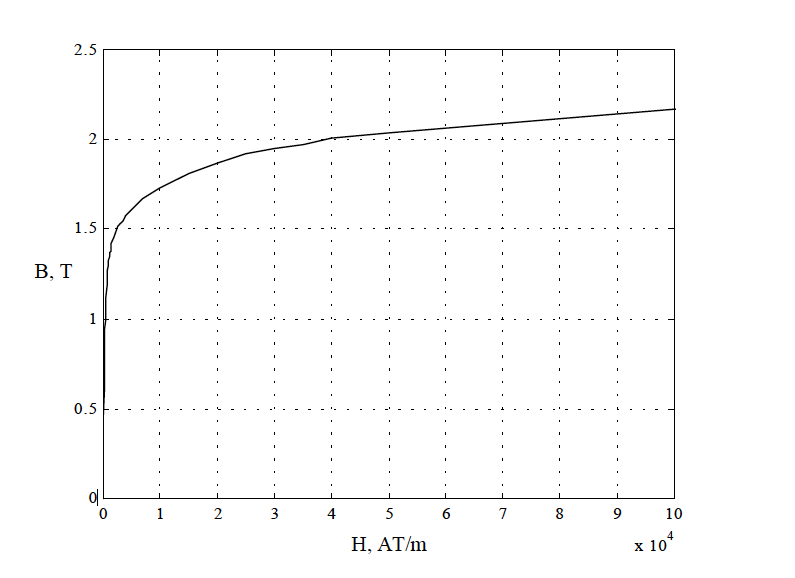

In [5]:
from IPython.display import Image
Image(filename='bhcurve.png',width=600)

Neglecting leakage and stacking factor, the stator pole area As can be written as,
A_s=D*L* βs/2

The flux in the stator pole φ is given by
φ = B_s*A_s

The flux in the yoke φy is given by
φ_y = φ/2=B_s*A_s/2

Assuming that the yoke flux density By is half the stator flux density Bs, the yoke flux can be
written as
φ_y = B_y*A_y=B_s*A_y/2
A_y=A_s

The yoke area is the product of back iron thickness C and the stack length. Therefore, the back
iron thickness is obtained as,
C=A_y/L

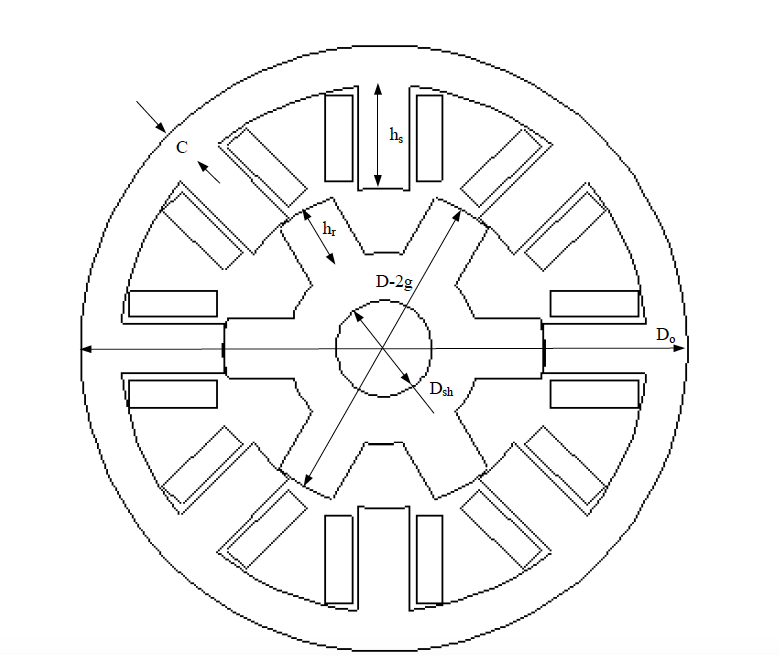

In [6]:
from IPython.display import Image
Image(filename='srm.png',width=600)

In [7]:
D_o=360 # Outer diameter
D=180 # bore diameter is assumed 180mm

To determine the main dimensions, it is necessary to keep the rotor length l as a multiple or submultiples k of bore diameter.
L=k*D 
For non-servo applications, the range of k can be 0.25 < k < 0.7

In [8]:
k=1
L=k*D
print('L=',round(L),'mm')

L= 180 mm


In [9]:
βs=2*math.pi/20
βr=2*math.pi/16
A_s=D*L*βs/2
print('A_s=',round(A_s)/10000,'m^2')

A_s= 0.5089 m^2


In [10]:
B_s=1.6 #stator pole flux density T

In [11]:
φ =B_s*A_s
print('φ=',round(φ)/10000,'Wb')

φ= 0.8143 Wb


In [12]:
φ_Y = φ/2
print('φ_Y=',round(φ_Y)/10000,'Wb')

φ_Y= 0.4072 Wb


The flux in the yoke φ_y is given by
φ_y =B_s*A_y/2 
Assuming that the yoke flux density By is half the stator flux density Bs, the yoke flux can be
written as φ_y = B_yA_y=B_sA_y/2 A_y=A_s

The area of the yoke Ay can be set as,
Ay = As 

In [13]:
A_y = A_s # yoke area 
print('A_y=',round(A_y)/10000,'m^2')

A_y= 0.5089 m^2


The yoke area is the product of back iron thickness C and the stack length. Therefore, the back
iron thickness is obtained as, C=A_y/L

In [14]:
C=A_y/L
print('C=',round(C),'mm')

C= 28 mm


In [15]:
h_s=D_o/2-C-D/2
print('h_s=',round(h_s),'mm')


h_s= 62 mm


In [16]:
g=0.6 # mm
A_r=(D/2-g)*L*βr #The rotor pole area 
print('A_r=',round(A_r)/10000,'m^2')

A_r= 0.6319 m^2


In [17]:
B_r=B_s*A_s/A_r #The rotor pole flux density 
print('B_r=',round(B_r),'Tesla')

B_r= 1 Tesla


The rotor core carries half the flux and is limited to a flux density of approximately 80% of the maximum
value. Hence,the rotor core flux density B_rc can be written as φrc = φ/2=0.8*B_s*A_r , A_rc=A_s/1.6

In [18]:
D_sh=30 # mm assumption
A_rc=A_s/1.6
h_r=D/2-g-D_sh/2-A_rc/L
print('h_r=',round(h_r),'mm')

h_r= 57 mm


In [19]:
φ_rc=φ/2 # flux 
A_g=(A_s+A_r)/2 #average area of airgap
ℜ_g=(2*g/1000)/(u_0*A_g/10000) # Reluctance of airgap
print('R_g=',round(R_g),'A*t/Wb')


R_g= 1674 A*t/Wb


In [20]:
l_s=h_s+C/2
print('l_s=',round(l_s),'mm')
l_r=h_r+(D/2-g-h_r-D_sh/2)/2
print('l_r=',round(l_r),'mm')
l_rc=math.pi*(D/4-g/2-h_r/2+D_sh/4)
print('l_rc=',round(l_rc),'mm')
l_y=math.pi*(D_o/2-C/2)
print('l_y=',round(l_y),'mm')

l_s= 76 mm
l_r= 66 mm
l_rc= 75 mm
l_y= 521 mm


In [21]:
B_air=A_s*B_s/A_g # flux density in the airgap
print('B_air=',round(B_air),'Tesla')

B_air= 1 Tesla


In [22]:
H_air=B_air/u_0
print('H_air=',round(H_air),'A*t')

H_air= 1135976 A*t


The magnetic circuit of the SRM is shown in Figure 2.7. The reluctances of the stator pole, yoke,
rotor pole, rotor core and air-gap are represented by ℜs, ℜy, ℜr, ℜrc and ℜg,respectively. The
lumped parameter ℜL

In [23]:
R_s=0
R_r=0
R_rc=0 # we assummed zero reluctance
ℜ_l=2*(ℜ_s+ℜ_g+ℜ_r)+ℜ_rc/2
ℑ_alligned = ℜ_l*φ
print('ℑ_alligned=',round(ℑ_alligned)/10000,'A*t')
Tph=ℑ_alligned/i # turns per phase
print('Tph=',round(Tph)/10000,'turns')

ℑ_alligned= 2726.3419 A*t
Tph= 24.7849 turns


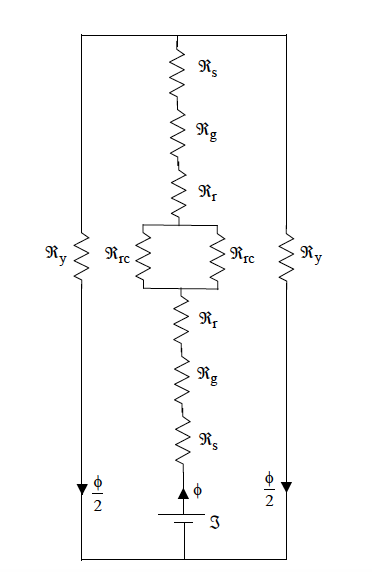

In [24]:
from IPython.display import Image
Image(filename='magnetic.png',width=300)

Now, the total ampere-turns ℑ required for the machine operation at full load can be calculated.
It is also known that ℑ_alligned = Tph*i .So we have to choose some  

Now, the total ampere-turns ℑ required for the machine operation at full load can be calculated.
It is also known that ℑ = Tphi . Since the peak current ip is assumed initially, the turns per phase
Tph can be calculated. The aligned inductance at maximum current is calculated as L_aligned=T_ph*φ/i=ℑ*B_s*A_s/(i_p)^2

In [25]:
A_f=(3*h_s*L)/4
L_f=(3*h_s*math.pi)/(4*2)
print('L_f=',round(L_f),'mm')

L_f= 73 mm


In [26]:
A_y=C*L # yoke area

In [27]:
A_sf=3*h_s*L/4 # The area of the stator pole

In [28]:
L_s=3*h_s/(2*4)+C/2 # The length of the path in the stator 

In [29]:
L_y=3*h_s/(2*4) # The yoke length


In [30]:
ℜ_f=L_f/(u_0*A_f) # The reluctance of the leakage tube
print('ℜ_f=',round(ℜ_f),'A*t/Wb')

ℜ_f= 6944 A*t/Wb


# Winding Design

The calculations leading to the selection of the conductor and the winding design are as follows.
Assuming a wedge of hwedge is required to hold the windings in place, the stator pole arc length ts
at the closest point of the winding to the center of the shaft is given 

In [31]:
h_wedge=10 #mm
t_s=(D/2+h_wedge)*βs
print('t_s=',round(t_s),'mm')

t_s= 31 mm


In [32]:
λ_s=math.pi*D/N_s+math.pi*2*h_wedge/N_s # stator pole pitch linkage
print('λ_s=',round(λ_s),'mm')

λ_s= 79 mm


In [33]:
J=13 #A/mm^2 thanks to liquid cooling
a_c=i/(2*J) #Assuming a maximum value of allowable current density J in the windings, the minimum area of
# conductor is given as,
print('a_c=',round(a_c),'mm^2')

a_c= 4 mm^2


In [34]:
d_w=math.sqrt(4*a_c/math.pi)+0.1 # mm wire diameter
print('d_w=',round(d_w),'mm')

d_w= 2 mm


In [35]:
h_w=h_s-h_wedge #The maximum height of the winding hw which can be accommodated inclusive of the space
# required to place wedges that hold the windings in place is given by
print('h_s=',round(h_s),'mm')

h_s= 62 mm


In [36]:
F_f=0.95 #winding factor
N_v=h_w*F_f/d_w
N_v

20.297609382437503

In [37]:
N_h=(Tph/1000)/(2*N_v)+1 # the number of horizontal layers required for winding 
w_t=d_w*N_h/F_f
w_t

18.10708560466379

In [38]:
Z =79-31 #mm λ_s − t_s The space between 2 stator pole tips at the bore 
print('Z=',round(Z),'mm')

Z= 48 mm


In [39]:
cl=Z-2*w_t #The clearance between the windings at the bore is given by
cl

11.785828790672419

In [40]:
w_t

18.10708560466379